In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob
from pprint import pprint
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.pyplot as plt

import cellcycle.PlottingTools as plottingTools
from cellcycle.ParameterSet import ParameterSet
import cellcycle.DataStorage as dataStorage
import cellcycle.DataAnalysis as dataAnalysis
import cellcycle.MakeDataframe as makeDataframe
from cellcycle import mainClass

In [2]:
model = 'Full_model' # options 'LDDR' or 'LDDR_titration' or 'Full_model'
indx = 2 # specified growth rate, if 0 then low

In [3]:
file_path_input_params_json = '../../input_params.json'
input_param_dict = mainClass.extract_variables_from_input_params_json(file_path_input_params_json)
root_path = input_param_dict["DATA_FOLDER_PATH"]
simulation_location = 'SI/S21_LD_LDDR_full_no_lipids/'+model # options 'SI/S13_LDDR_titration_SeqA/model' or 'SI/S19_LD_LDDR_full_no_lipids/model'
file_path = os.path.join(root_path, simulation_location)
print('file_path', file_path)
parameter_path = os.path.join(file_path, 'parameter_set.csv')
print('parameter_path', parameter_path)

file_path /home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S21_LD_LDDR_full_no_lipids/Full_model
parameter_path /home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S21_LD_LDDR_full_no_lipids/Full_model/parameter_set.csv


# Make data frame from time traces

In [4]:
data_frame_0 = makeDataframe.make_dataframe(file_path)
# make data frame with oriC dependent lipids

data_frame = data_frame_0.loc[data_frame_0['activation_rate_lipids'] == 0].sort_values(by=['rate_growth'])

time_traces_data_frame = pd.read_hdf(data_frame['path_dataset'].iloc[indx], key='dataset_time_traces')

v_init_data_frame = pd.read_hdf(data_frame['path_dataset'].iloc[indx], key='dataset_init_events')
v_init = v_init_data_frame.iloc[-1]['v_init_per_ori']
v_init_per_ori = v_init_data_frame.iloc[-1]['v_init_per_ori']
t_init_list = v_init_data_frame['t_init'].to_numpy()

v_d_data_frame = pd.read_hdf(data_frame['path_dataset'].iloc[indx], key='dataset_div_events')
data_frame

['/home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S21_LD_LDDR_full_no_lipids/Full_model/S11_Full_model_2.pdf',
 '/home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S21_LD_LDDR_full_no_lipids/Full_model/S11_Full_model_0.pdf',
 '/home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S21_LD_LDDR_full_no_lipids/Full_model/full_model_lipids_oriC',
 '/home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S21_LD_LDDR_full_no_lipids/Full_model/full_model_no_lipids_datA_20_100']


,activation_rate_dars1,activation_rate_dars2,activation_rate_lipids,amplitude_oscillations,aspect_ratio,basal_rate_initiator,basal_rate_initiator_0,basal_rate_regulator,basal_rate_regulator_0,block_production,...,total_conc,underexpression_oscillations,v_0,v_init_th,verbose,version_of_coupled_division_regulation,version_of_independent_division_regulation,version_of_lipid_regulation,version_of_model,version_of_titration
3,100.0,50.0,0.0,30.0,4.0,519.860385,1500.0,24.260151,70.0,1,...,400.0,0,0.1,0.28,NaN,cooper,IDA,proteome_sector,switch_titration,regulator_is_initiator
5,100.0,50.0,0.0,30.0,4.0,1782.378464,1500.0,83.177662,70.0,1,...,400.0,0,0.1,0.28,NaN,cooper,IDA,proteome_sector,switch_titration,regulator_is_initiator
4,100.0,50.0,0.0,30.0,4.0,2495.329850,1500.0,116.448726,70.0,1,...,400.0,0,0.1,0.28,NaN,cooper,IDA,proteome_sector,switch_titration,regulator_is_initiator


In [5]:
time = np.array(time_traces_data_frame["time"])
volume = np.array(time_traces_data_frame["volume"])
n_ori = np.array(time_traces_data_frame["n_ori"])
active_fraction = np.array(time_traces_data_frame["active_fraction"])
free_conc = np.array(time_traces_data_frame["free_conc"])
print(time.size)
cycle_0 = 8
cycle_f = cycle_0 + 3
t_0 = time[volume==v_d_data_frame['v_b'][cycle_0]]
indx_0 = np.where(time==t_0)[0][0]
t_f = time[volume==v_d_data_frame['v_b'][cycle_f]]
indx_f = np.where(time==t_f)[0][0]+10

print(indx_0, indx_f)

n_ori_cut = n_ori[indx_0:indx_f]
time_cut = time[indx_0:indx_f]
volume_cut = volume[indx_0:indx_f]
active_fraction_cut = active_fraction[indx_0:indx_f]
free_conc_cut = free_conc[indx_0:indx_f]

t_init_list_cut_1 = t_init_list[t_init_list>t_0]
t_init_list_cut = t_init_list_cut_1[t_init_list_cut_1<t_f]
t_b = t_init_list + data_frame.iloc[indx]['t_CD']
t_b_cut_1 = t_b[t_b<t_f]
t_b_cut = t_b_cut_1[t_b_cut_1>t_0]
print(t_init_list_cut, t_b_cut)

16667
4849 6110
[5.098 5.515 5.932] [5.264 5.681 6.098]


# Lipid activation oriC dependent

In [6]:
data_frame_oriC_lipids = data_frame_0.loc[data_frame_0['activation_rate_lipids'] != 0].sort_values(by=['rate_growth'])
# print(data_frame_oriC_lipids)
time_traces_oriC_data_frame = pd.read_hdf(data_frame_oriC_lipids['path_dataset'].iloc[indx], key='dataset_time_traces')
v_d_data_frame_oriC = pd.read_hdf(data_frame_oriC_lipids['path_dataset'].iloc[indx], key='dataset_div_events')

active_fraction_oriC = np.array(time_traces_oriC_data_frame["active_fraction"])
time_oriC = np.array(time_traces_oriC_data_frame["time"])
volume_oriC = np.array(time_traces_oriC_data_frame["volume"])
free_conc_oriC = np.array(time_traces_oriC_data_frame["free_conc"])
# print(time_oriC)

t_0_oriC = time_oriC[volume_oriC==v_d_data_frame_oriC['v_b'][cycle_0]]
indx_0_oriC = np.where(time_oriC==t_0_oriC)[0][0]
t_f_oriC = time_oriC[volume_oriC==v_d_data_frame_oriC['v_b'][cycle_f]]
indx_f_oriC = indx_0_oriC + indx_f-indx_0

print('indices cut: ', indx_0_oriC, indx_f_oriC, indx_f_oriC-indx_0_oriC)
active_fraction_cut_oriC = active_fraction_oriC[indx_0_oriC:indx_f_oriC]
time_cut_oriC = time_oriC[indx_0_oriC:indx_f_oriC]
free_conc_cut_oriC = free_conc_oriC[indx_0_oriC:indx_f_oriC]

data_frame_oriC_lipids

indices cut:  4848 6109 1261


,activation_rate_dars1,activation_rate_dars2,activation_rate_lipids,amplitude_oscillations,aspect_ratio,basal_rate_initiator,basal_rate_initiator_0,basal_rate_regulator,basal_rate_regulator_0,block_production,...,total_conc,underexpression_oscillations,v_0,v_init_th,verbose,version_of_coupled_division_regulation,version_of_independent_division_regulation,version_of_lipid_regulation,version_of_model,version_of_titration
0,100.0,50.0,100.0,0.0,4.0,519.860385,1500.0,24.260151,70.0,1,...,400.0,0,0.1,0.28,1.0,cooper,IDA,proteome_sector,switch_titration,regulator_is_initiator
2,100.0,50.0,100.0,0.0,4.0,1782.378464,1500.0,83.177662,70.0,1,...,400.0,0,0.1,0.28,1.0,cooper,IDA,proteome_sector,switch_titration,regulator_is_initiator
1,100.0,50.0,100.0,0.0,4.0,2495.329850,1500.0,116.448726,70.0,1,...,400.0,0,0.1,0.28,1.0,cooper,IDA,proteome_sector,switch_titration,regulator_is_initiator


# Color definitions

In [7]:
pinkish_red = (247 / 255, 109 / 255, 109 / 255)
green = (0 / 255, 133 / 255, 86 / 255)
dark_blue = (36 / 255, 49 / 255, 94 / 255)
light_blue = (168 / 255, 209 / 255, 231 / 255)
darker_light_blue = (112 / 255, 157 / 255, 182 / 255)
blue = (55 / 255, 71 / 255, 133 / 255)
yellow = (247 / 255, 233 / 255, 160 / 255)

# Plot three figures

t_start: 5.266
0.4166666666666667
t_end: 5.683
indices: 5266 5683
t_start: 3.196
0.4166666666666667
t_end: 3.606
indices: 3196 3606
2.4
number of titration sites per origin: 300.0


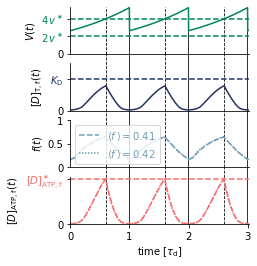

In [8]:
label_list = [r'$V(t)$', r'$[D]_{\rm T, f}(t)$', r'$f(t)$', r'$[D]_{\rm ATP, f}(t)$']
x_axes_list = [time_cut, time_cut, time_cut, time_cut]
y_axes_list = [volume_cut, free_conc_cut, active_fraction_cut, free_conc_cut * active_fraction_cut]
legend_bool_list = [0, 0, 1, 0]
legend_list = [' ', ' ', r'$\langle f \, \rangle = {}$'.format(np.round(dataAnalysis.calculate_average_active_fraction(data_frame, cycle_0, indx), 2))]
legend_oriC_lipids =  r'$\langle f \, \rangle = {}$'.format(np.round(dataAnalysis.calculate_average_active_fraction(data_frame_oriC_lipids, 3, indx), 2))
color_list = [green, dark_blue, darker_light_blue, pinkish_red]
fig, ax = plt.subplots(4, figsize=(3.2,4))
plt.xlabel(r'time [$\tau_{\rm d}$]')
y_min_list = [0,0,0,0]
y_max_list = [1, 1.2, 1.2, 1.2]

doubling_time = 1/data_frame.iloc[indx]['doubling_rate']
print(1/doubling_time)
print('number of titration sites per origin:', data_frame.iloc[indx]['n_c_max_0'])
for item in range(0, len(label_list)):
    ax[item].set_ylabel(label_list[item])
#     ax[item].plot(x_axes_list[item], y_axes_list[item], color=color_list[item])
    if item == 2:
        ax[item].plot(x_axes_list[item], y_axes_list[item], color=color_list[item], label= legend_list[item], linestyle='dashed')
        ax[item].plot(time_cut, active_fraction_cut_oriC, color=color_list[item], label= legend_oriC_lipids, linestyle=(0, (1, 1)))
        legend = ax[item].legend()
        for text in legend.get_texts():
            text.set_color(darker_light_blue)
    elif item == 3:
        ax[item].plot(x_axes_list[item], y_axes_list[item], color=color_list[item], linestyle='dashed')
        ax[item].plot(time_cut, active_fraction_cut_oriC * free_conc_cut_oriC, color=color_list[item], linestyle=(0, (1, 1)))
        
    else:
        ax[item].plot(x_axes_list[item], y_axes_list[item], color=color_list[item])
#     if legend_bool_list[item] == 1:
#         ax[item].annotate(legend_list[item],xy=(148.5, 7), xycoords='axes points', ha='center', va='bottom', 
#             bbox=dict(boxstyle='round', lw=0.7, fc='w',pad=0.3, color=light_blue), color=light_blue)
    ax[item].set_ylim(ymin=0)
    ax[item].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    ax[item].spines["top"].set_visible(False)
    ax[item].spines["right"].set_visible(False)
    ax[item].margins(0)
    for t_div in t_b_cut:
        ax[item].axvline(x=t_div, 
                          ymin=y_min_list[item],
                          ymax=y_max_list[item],
                             c="black",
                          zorder=0, 
                          linewidth=0.8,
                          clip_on=False)
    for t_init in t_init_list_cut:
        ax[item].axvline(x=t_init, 
                          ymin=y_min_list[item],
                          ymax=y_max_list[item],
                             c="black",
                          zorder=0, 
                          linewidth=0.8,
                          linestyle='--',
                          clip_on=False)

if indx==0:
    ax[0].set_yticks([0, v_init])
    ax[0].set_yticklabels(['0',r'$v^\ast$'])
    ax[0].get_yticklabels()[1].set_color(green)
    ax[0].axhline(y=v_init, color=green, linestyle='--')
    
if indx==1:
    ax[0].set_yticks([0, v_init, 2*v_init])
    ax[0].set_yticklabels(['0',r'$v^\ast$',r'$2 \, v^\ast$'])
    ax[0].get_yticklabels()[1].set_color(green)
    ax[0].get_yticklabels()[2].set_color(green)
    ax[0].axhline(y=v_init, color=green, linestyle='--')
    ax[0].axhline(y=2 * v_init, color=green, linestyle='--')
    
if indx==2:
    ax[0].set_yticks([0, 2 * v_init, 4*v_init])
    ax[0].set_yticklabels(['0',r'$2 \, v^\ast$',r'$4 \, v^\ast$'])
    ax[0].get_yticklabels()[1].set_color(green)
    ax[0].get_yticklabels()[2].set_color(green)
    ax[0].axhline(y=2 * v_init, color=green, linestyle='--')
    ax[0].axhline(y=4 * v_init, color=green, linestyle='--')
    
# ax[0].set_yticks([0, v_init_per_ori, 2*v_init_per_ori, 4*v_init_per_ori])
# # ax[0].set(ylim=(0, v_init+0.01))
# ax[0].set_yticklabels(['0',r'$v^\ast$',r'$2 \,v^\ast$',r'$4 \, v^\ast$'])
# ax[0].get_yticklabels()[1].set_color(green)
# ax[0].get_yticklabels()[2].set_color(green)
# ax[0].get_yticklabels()[3].set_color(green)
# ax[0].axhline(y=v_init, color=green, linestyle='--')

ax[1].axhline(y=data_frame.iloc[0]['michaelis_const_initiator'], color=color_list[1], linestyle='--')
ax[1].set_yticks([0, data_frame.iloc[0]['michaelis_const_initiator']])
ax[1].set_yticklabels([0, r'$K_{\rm D}$'])
ax[1].get_yticklabels()[1].set_color(color_list[1])
ax[1].set(ylim=(0,data_frame.iloc[0]['michaelis_const_initiator']*1.5))

ax[2].set_yticks([0, 0.5, 1])
ax[2].set_yticklabels(['0', '0.5', '1'])

ax[3].set_yticks([0, data_frame.iloc[0]['critical_free_active_conc']])
ax[3].set_yticklabels(['0',r'$[D]_{\rm ATP, f}^\ast$'])
ax[3].get_yticklabels()[1].set_color(color_list[3])
if model == 'LDDR':
    ax[3].axhline(y=data_frame.iloc[0]['init_conc'], color=color_list[3], linestyle='--')
else:
    ax[3].axhline(y=data_frame.iloc[0]['critical_free_active_conc'], color=color_list[3], linestyle='--')
ax[3].tick_params(bottom=True, labelbottom=True)
ax[3].tick_params(axis='x', colors='black')
ax[3].set_xticks([time_cut[0], 
                  time_cut[0]+ doubling_time, 
                  time_cut[0]+ 2*doubling_time,
                  time_cut[0]+ 3*doubling_time
                 ])
ax[3].set_xticklabels(['0', '1', '2', '3'])
plt.savefig(file_path + '/S11_'+model+'_'+str(indx)+'.pdf', format='pdf',bbox_inches='tight')